In [1]:
import pandas as pd
import numpy as np
import sigfig
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
plt.rcParams.update(mpl.rcParamsDefault)

def rd(valor, error):
    return eval('("' + sigfig.round(valor, error, cutoff=19, sep ='","') + '")')


def tex(panda, columnas):
    l = len(panda)
    a = len(columnas)
    print('\\begin{array}{|' + 'l|'*a + '} \\hline')
    for fila in range(l):
        s = ''
        for col in columnas:
            s+= str(panda[col][fila]) + ' & '
        print(s[0: -2] + ' \\\\ \\hline')
    print('\\end{array}')

def regresion(x, y):
    n = len(x)
    xc = x.sum()/n
    yc = y.sum()/n
    sx = math.sqrt(((x**2).sum()/n)-xc**2)
    sy = math.sqrt(((y**2).sum()/n)-yc**2)
    sxy = ((x*y).sum()/n)-xc*yc
    r = sxy/(sx*sy)
    m = sxy/(sx**2)
    b = yc - m*xc
    em = (sy/sx)*math.sqrt((1-r**2)/(n-2))
    eb = em*math.sqrt(sx**2 + xc**2)
    return(m, b, em, eb, r)

In [9]:
datos = pd.read_csv('D:/Latex/UNED/Primer curso/Tecnicas experimentales/condensador/Datos/condensador.csv', names=['t', 'v'])

In [10]:
tex(datos, ['t','v'])

\begin{array}{|l|l|} \hline
2.0 & 7.98  \\ \hline
3.82 & 7.22  \\ \hline
5.81 & 6.39  \\ \hline
6.06 & 6.27  \\ \hline
8.16 & 5.53  \\ \hline
10.06 & 5.02  \\ \hline
12.12 & 4.46  \\ \hline
14.29 & 4.02  \\ \hline
15.28 & 3.7  \\ \hline
17.01 & 3.23  \\ \hline
18.72 & 3.05  \\ \hline
20.09 & 2.88  \\ \hline
22.09 & 2.61  \\ \hline
24.19 & 2.26  \\ \hline
26.37 & 2.03  \\ \hline
\end{array}


In [13]:
datos['lnv'] = np.log(datos['v'])
datos['elnv'] = 0.001/datos['v']
for fila in range(len(datos)):
    a, b = datos['lnv'][fila], datos['elnv'][fila]
    a, b = rd(a, b)
    a, b = float(a), float(b)
    datos['lnv'][fila], datos['elnv'][fila] = a, b

In [24]:
tex(datos, ['t','lnv', 'elnv'])

\begin{array}{|l|l|l|} \hline
2.0 & 2.07694 & 0.00013  \\ \hline
3.82 & 1.97685 & 0.00014  \\ \hline
5.81 & 1.85473 & 0.00016  \\ \hline
6.06 & 1.83578 & 0.00016  \\ \hline
8.16 & 1.71019 & 0.00018  \\ \hline
10.06 & 1.6134 & 0.0002  \\ \hline
12.12 & 1.4951 & 0.0002  \\ \hline
14.29 & 1.3913 & 0.0002  \\ \hline
15.28 & 1.3083 & 0.0003  \\ \hline
17.01 & 1.1725 & 0.0003  \\ \hline
18.72 & 1.1151 & 0.0003  \\ \hline
20.09 & 1.0578 & 0.0003  \\ \hline
22.09 & 0.9594 & 0.0004  \\ \hline
24.19 & 0.8154 & 0.0004  \\ \hline
26.37 & 0.708 & 0.0005  \\ \hline
\end{array}


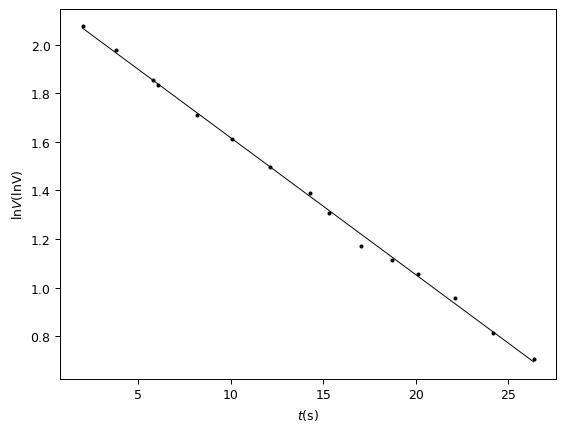

In [23]:
m, n, em, en, r = regresion(datos['t'], datos['lnv'])
plt.rcParams.update({'font.size': 9})
plt.rcParams['axes.linewidth'] = 0.7
plt.rcParams['xtick.major.width'] = 0.7
plt.rcParams['ytick.major.width'] = 0.7
plt.ylabel('ln$V$(lnV)')
plt.xlabel('$t$(s)')
mm = min(datos['t'])
MM = max(datos['t'])
plt.plot([mm, MM], [m*mm+n, m*MM+n], color='black', linewidth=0.7)
plt.scatter(datos['t'], datos['lnv'], s=4, c='black', marker='8')
plt.savefig('D:/Latex/UNED/Primer curso/Tecnicas experimentales/condensador/figures/regresión.png', dpi=1000, bbox_inches='tight')
plt.show()

In [25]:
rd(m,em)

('-0.0563', '0.0006')

In [26]:
rd(n,en)

('2.180', '0.010')

In [28]:
m, em = rd(m,em)
m, em = float(m), float(em)
n, en = rd(n,en)
n, en = float(n), float(en)

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sigfig\sigfig.py:586: UserWarning: warning: 2 significant figures requested from number with only 1 significant figures
  warn("warning: %d significant figures requested from number with only %d significant figures" % (given['sigfigs'], len(num.map)))


In [33]:
rd(-1/m, em/m**2)

('17.76', '0.19')

In [35]:
rd(np.exp(n), np.exp(n)*en)

('8.85', '0.09')

\begin{array}{|l|l|l|l|} \hline
2.8 & 8.9 & 2.18605 & 0.00011  \\ \hline
59.88 & 6.65 & 1.89462 & 0.00015  \\ \hline
8.48 & 8.6 & 2.15176 & 0.00012  \\ \hline
56.62 & 6.71 & 1.9036 & 0.00015  \\ \hline
11.05 & 8.47 & 2.13653 & 0.00012  \\ \hline
32.64 & 7.54 & 2.02022 & 0.00013  \\ \hline
49.24 & 6.95 & 1.93874 & 0.00014  \\ \hline
6.33 & 8.62 & 2.15409 & 0.00012  \\ \hline
15.31 & 8.24 & 2.109 & 0.00012  \\ \hline
21.27 & 8.04 & 2.08443 & 0.00012  \\ \hline
39.52 & 7.3 & 1.98787 & 0.00014  \\ \hline
24.84 & 7.88 & 2.06433 & 0.00013  \\ \hline
37.87 & 7.39 & 2.00013 & 0.00014  \\ \hline
27.33 & 7.8 & 2.05412 & 0.00013  \\ \hline
45.21 & 7.13 & 1.96431 & 0.00014  \\ \hline
17.27 & 8.19 & 2.10291 & 0.00012  \\ \hline
30.43 & 7.65 & 2.03471 & 0.00013  \\ \hline
55.08 & 6.74 & 1.90806 & 0.00015  \\ \hline
35.12 & 7.49 & 2.01357 & 0.00013  \\ \hline
41.86 & 7.26 & 1.98238 & 0.00014  \\ \hline
\end{array}


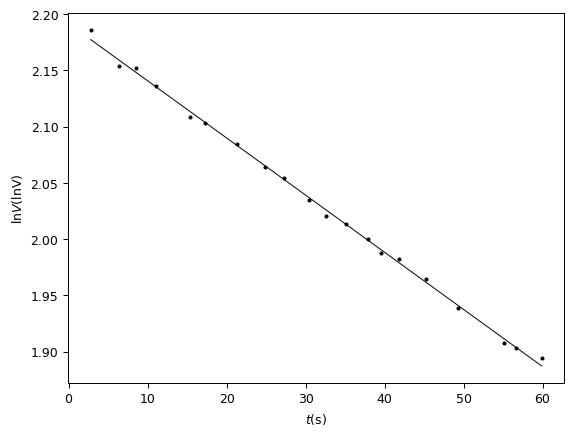

In [39]:
datos = pd.read_csv('D:/Latex/UNED/Primer curso/Tecnicas experimentales/condensador/Datos/condensador_sin.csv', names=['t', 'v'])
datos['lnv'] = np.log(datos['v'])
datos['elnv'] = 0.001/datos['v']
for fila in range(len(datos)):
    a, b = datos['lnv'][fila], datos['elnv'][fila]
    a, b = rd(a, b)
    a, b = float(a), float(b)
    datos['lnv'][fila], datos['elnv'][fila] = a, b
tex(datos, ['t','v', 'lnv', 'elnv'])
m, n, em, en, r = regresion(datos['t'], datos['lnv'])
plt.rcParams.update({'font.size': 9})
plt.rcParams['axes.linewidth'] = 0.7
plt.rcParams['xtick.major.width'] = 0.7
plt.rcParams['ytick.major.width'] = 0.7
plt.ylabel('ln$V$(lnV)')
plt.xlabel('$t$(s)')
mm = min(datos['t'])
MM = max(datos['t'])
plt.plot([mm, MM], [m*mm+n, m*MM+n], color='black', linewidth=0.7)
plt.scatter(datos['t'], datos['lnv'], s=4, c='black', marker='8')
plt.savefig('D:/Latex/UNED/Primer curso/Tecnicas experimentales/condensador/figures/regresión_sin.png', dpi=1000, bbox_inches='tight')
plt.show()
m, em = rd(m,em)
m, em = float(m), float(em)
n, en = rd(n,en)
n, en = float(n), float(en)

In [40]:
rd(-1/m, em/m**2)

('196.9', '1.9')

In [41]:
rd(np.exp(n), np.exp(n)*en)

('8.950', '0.016')